# **Prepare**

# work used for cleansing the acquire text data and preping it for exploration.

In [43]:
# imports
import json
import pandas as pd
import prepare as p

In [44]:
# Load the REPOS list from the JSON file
file_name = 'repo_processed.json'

with open(file_name, 'r') as file:
    repos = json.load(file)

In [45]:
# Here we're using pandas to produce datframe
repos_df = pd.DataFrame(repos)
repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


  # Investigation

In [46]:
language_df = p.prep_text_data(repos_df,
                               'language', 
                               extra_words = [
                                    'C++',
                                    'Python',
                                    'JavaScript',
                                    'C',
                                    'Java',
                                    'TypeScript',
                                    'C#',
                                    'Rust',
                                    'Ruby',
                                    'Kotlin',
                                    'Julia',
                                    'PHP',
                                    'Swift',
                                    'Common Lisp',
                                    'Scheme',
                                    'Dart',
                                    'Scala',
                                    'Objective-C',
                                    'Lua',
                                    'Prolog'
                               ], 
                               exclude_words = [
                                    "Jupyter Notebook",
                                    "HTML",
                                    "Go",
                                    "Shell",
                                    "TeX",
                                    "CMake",
                                    "Dockerfile",
                                    "OpenSCAD",
                                    "MQL5",
                                    "Vue",
                                    "Smali",
                                    "Matlab",
                                    "RobotFramework",
                                    "Cuda",
                                    "SCSS"
                                ])
                                                                                                 
language_df.head()

,repo,language,readme_contents,clean_readme,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",python,python,python
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...,,,
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",python,python,python
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...,,,
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,c,c,c


In [47]:
language_df.language.value_counts()

language
C++                 208
Python              201
JavaScript           35
C                    19
Jupyter Notebook     19
Java                 14
TypeScript           14
C#                   13
HTML                 12
Go                   12
Rust                 10
MATLAB                9
Shell                 6
TeX                   4
Ruby                  4
CMake                 4
Kotlin                4
Julia                 3
PHP                   3
Dockerfile            3
Swift                 2
OpenSCAD              2
MQL5                  1
Common Lisp           1
Scheme                1
Vue                   1
Smali                 1
Dart                  1
Matlab                1
Scala                 1
RobotFramework        1
Objective-C           1
Lua                   1
Prolog                1
Cuda                  1
SCSS                  1
Name: count, dtype: int64

In [6]:
# lem and unlem check for ou and html tags

In [48]:
# Load the REPOS list from the JSON file
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)
    
repos_df = pd.DataFrame(repo_loaded)

repos_df

,repo,language,readme_contents
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont..."


In [49]:
repos_df = p.prep_text_data(repos_df, 'readme_contents', extra_words = [], exclude_words = [])
repos_df

,repo,language,readme_contents,clean_readme,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...
1,kiloreux/awesome-robotics,None,Awesome Robotics\n================\n\n[![Aweso...,awesome robotics awesomehttpscdnrawgitcomsindr...,awesom robot awesomehttpscdnrawgitcomsindresor...,awesome robotics awesomehttpscdnrawgitcomsindr...
2,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",modern robotics mechanics planning control cod...,modern robot mechan plan control code librari ...,modern robotics mechanic planning control code...
3,mithi/robotics-coursework,None,# [🐳](https://mithi.github.io/deep-blueberry) ...,httpsmithigithubiodeepblueberry httpskoficommi...,httpsmithigithubiodeepblueberri httpskoficommi...,httpsmithigithubiodeepblueberry httpskoficommi...
4,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,cpprobotics cpp implementation pythonroboticsh...,cpprobot cpp implement pythonroboticshttpsgith...,cpprobotics cpp implementation pythonroboticsh...
...,...,...,...,...,...,...
672,CatchZeng/dingtalk,Go,# dingtalk\n\n![Go](https://github.com/CatchZe...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...,dingtalk gohttpsgithubcomcatchzengdingtalkwork...
673,1c7/Translate-Subtitle-File,None,## 字幕组机翻小助手 - [视频演示](https://www.bilibili.com/...,httpswwwbilibilicomvideoav82675511 httpsdocter...,httpswwwbilibilicomvideoav82675511 httpsdocter...,httpswwwbilibilicomvideoav82675511 httpsdocter...
674,landy22granatt/Kumpulan-Script-Termux,Python,pkg update && pkg upgrade\npkg install bash\np...,pkg update pkg upgrade pkg install bash pkg in...,pkg updat pkg upgrad pkg instal bash pkg insta...,pkg update pkg upgrade pkg install bash pkg in...
675,cirosantilli/china-dictatorship,HTML,"<style>\npre{ white-space:pre }\n#header,#cont...",style pre whitespacepre headercontentfootnotes...,style pre whitespacepr headercontentfootnotesf...,style pre whitespacepre headercontentfootnotes...


# Johns Process Dataframe function (edited) check for odd words in result

In [57]:
with open(file_name, 'r') as file:
    repo_loaded = json.load(file)
    
repos_df = pd.DataFrame(repo_loaded)

In [58]:
import prepare as p
# Function to apply cleaning and processing functions from prepare.py
def process_dataframe(df, extra_words= [], exclude_words= []):
    # Create a new column 'original' and assign the values from 'content'
    df['original'] = df['readme_contents']
    
    # Apply the basic_clean function to 'original', then tokenize the result, and remove stopwords
    df['clean'] = df['original'].apply(p.basic_clean).apply(p.tokenize)
    
    df['remove_stopwords'] = df['clean'].apply(lambda x: p.remove_stopwords(x, extra_words, exclude_words))
    
    # Apply the stem function to 'clean' column
    df['stemmed'] = df['remove_stopwords'].apply(p.stem)
    
    # Apply the lemmatize function to 'clean' column
    df['lemmatized'] = df['remove_stopwords'].apply(p.lemmatize)
    
    # Drop the 'content' column from the dataframe
    df = df.drop(columns='readme_contents', axis=1)
    
    # Return the modified dataframe
    return df

In [59]:
# Run the cleaning script
extra_words = []
exclude_words = []
repos_df = process_dataframe(repos_df, extra_words, exclude_words)
# rename to un_lemmatized
repos_df['un_lemmatized'] = repos_df['remove_stopwords']
# get rid of the unnecessary processed columns 
repos_df = repos_df.drop(columns=['original', 'clean', 'remove_stopwords', 'stemmed'])#, 'lemmatized'])
# Remove repos without a readme
repos_df = repos_df[repos_df['un_lemmatized'] != 'failtoloadreadme']
# Split lemmatized text and stack it into a DataFrame
all_words_lemmatized = repos_df.lemmatized.str.split(expand=True).stack()
all_words_un_lemmatized = repos_df.un_lemmatized.str.split(expand=True).stack()
# combine the two pd series we created in the step before into a single df
all_words_df = pd.DataFrame({
    'lemmatized': all_words_lemmatized,
    'un_lemmatized': all_words_un_lemmatized
})

# filter the df by lemmatized
filtered_rows = all_words_df[all_words_df.lemmatized == 'ou']
filtered_rows

lemmatized un_lemmatized
348 1081         ou            ou
    1114         ou            ou
607 3070         ou            ou
669 983          ou            ou
    1044         ou            ou

In [60]:
len(filtered_rows)

5

  # Cleaning

In [76]:
file_name = 'repo_processed.json'

with open(file_name, 'r') as file:
    repos = json.load(file)

In [77]:
import prepare as p

repos_df = pd.DataFrame(repos)

# Apply the clean function element-wise to the 'readme_contents' column
repos_df = p.prep_text_data(repos_df, 'readme_contents', extra_words=[], exclude_words=[])

# Filter rows with 'readme_contents' not equal to 'FailToLoadReadME'
repos_df = repos_df[repos_df['readme_contents'] != 'FailToLoadReadME']

# rename column
repos_df.rename(columns={'readme_contents': 'text'}, inplace=True)

# Drop the 'readme_contents' column
repos_df.drop(columns=([]), inplace=True)

# Filter rows where 'language' is not NaN and reset the index
repos_df = repos_df[repos_df.language.notna()].reset_index(drop=True)

In [78]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611 entries, 0 to 610
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   repo          611 non-null    object
 1   language      611 non-null    object
 2   text          611 non-null    object
 3   clean_readme  611 non-null    object
 4   stemmed       611 non-null    object
 5   lemmatized    611 non-null    object
dtypes: object(6)
memory usage: 28.8+ KB


In [79]:
repos_df.head()

,repo,language,text,clean_readme,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...
1,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",modern robotics mechanics planning control cod...,modern robot mechan plan control code librari ...,modern robotics mechanic planning control code...
2,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,cpprobotics cpp implementation pythonroboticsh...,cpprobot cpp implement pythonroboticshttpsgith...,cpprobotics cpp implementation pythonroboticsh...
3,JdeRobot/RoboticsAcademy,JavaScript,"<a href=""https://jderobot.github.io/""><img src...",hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...
4,pptacher/probabilistic_robotics,C++,# probabilistic_robotics\nI am working on deta...,probabilisticrobotics working detailed solutio...,probabilisticrobot work detail solut exercis b...,probabilisticrobotics working detailed solutio...


  # looking at text and after some preparation

In [80]:
repos_df.iloc[10].clean_readme

'httpsgithubcomrwaldronjohnnyfiverawmainassetssgierjohnnyfivepng johnnyfive javascript robotics programming framework hello please dont edit file youd like make changes readme contents please make tplreadmemd file youd like add example add file egadd breadboard image docsbreadboardsadd entry tplprogramsjson generated markdown grunt examples artwork mike sgierhttpmsgierillustrationcom build lint test measure coveragehttpsgithubcomrwaldronjohnnyfiveactionsworkflowsnpmgruntymlbadgesvghttpsgithubcomrwaldronjohnnyfiveactions appveyor build statushttpsciappveyorcomapiprojectsstatushmke71k7uemtnamibranchmainsvgtruehttpsciappveyorcomprojectrwaldronjohnnyfive coverage statushttpscoverallsioreposgithubrwaldronjohnnyfivebadgesvgbranchmainhttpscoverallsiogithubrwaldronjohnnyfivebranchmain install sizehttpspackagephobianowshbadgepjohnnyfivehttpspackagephobianowshresultpjohnnyfive gitterhttpsimgshieldsiogitterroomnwjsnwjssvghttpsgitterimrwaldronjohnnyfive johnnyfive open source firmata protocol base

## counting words in 'clean_readme' column and seeing what can be removed or excluded as a stop word

In [81]:
from collections import Counter

# Analyze the 'clean_readme' column to identify common words
common_words = ' '.join(repos_df['clean_readme']).split()
word_counts = Counter(common_words)

In [82]:
word_counts

Counter({'robot': 2199,
         'using': 1952,
         'use': 1890,
         'ros': 1801,
         'install': 1750,
         'build': 1697,
         'img': 1467,
         'see': 1428,
         'run': 1411,
         'data': 1316,
         'python': 1305,
         '3d': 1201,
         'learning': 1194,
         'robotics': 1108,
         'code': 1091,
         'robots': 959,
         'image': 935,
         'p': 915,
         'point': 893,
         'also': 875,
         'please': 873,
         'object': 852,
         'used': 850,
         'bash': 847,
         'software': 828,
         'control': 821,
         'file': 821,
         'arxiv': 818,
         'model': 803,
         'project': 799,
         'following': 768,
         'example': 759,
         'set': 759,
         'source': 757,
         'cd': 739,
         'system': 736,
         'library': 715,
         'c': 708,
         'environment': 705,
         'make': 704,
         'new': 697,
         'version': 674,
         'support

In [83]:
common_words

['img',
 'srchttpsgithubcomatsushisakaipythonroboticsrawmastericonpngrawtrue',
 'alignright',
 'width300',
 'altheader',
 'pic',
 'pythonrobotics',
 'githubactionlinuxcihttpsgithubcomatsushisakaipythonroboticsworkflowslinuxcibadgesvg',
 'githubactionmacoscihttpsgithubcomatsushisakaipythonroboticsworkflowsmacoscibadgesvg',
 'githubactionwindowscihttpsgithubcomatsushisakaipythonroboticsworkflowswindowscibadgesvg',
 'build',
 'statushttpsciappveyorcomapiprojectsstatussb279kxuv1be391gsvgtruehttpsciappveyorcomprojectatsushisakaipythonrobotics',
 'codecovhttpscodecovioghatsushisakaipythonroboticsbranchmastergraphbadgesvghttpscodecovioghatsushisakaipythonrobotics',
 'python',
 'codes',
 'robotics',
 'algorithm',
 'table',
 'contents',
 'thiswhatisthis',
 'requirementsrequirements',
 'documentationdocumentation',
 'usehowtouse',
 'localizationlocalization',
 'extended',
 'kalman',
 'filter',
 'localizationextendedkalmanfilterlocalization',
 'particle',
 'filter',
 'localizationparticlefilterlo

In [84]:

# Filter for words with lengths between 3 and 10 characters
common_words_3_to_10 = [word for word, count in word_counts.items() if 3 <= len(word) <= 10]

# Create a list of the most common words with lengths between 3 and 10 characters
most_common_words_3_to_10 = [(word, count) for word, count in word_counts.items() if 3 <= len(word) <= 10]

# Sort the list by count in descending order
most_common_words_3_to_10.sort(key=lambda x: x[1], reverse=True)

# Return the most common words with lengths between 3 and 10 characters
most_common_words_3_to_10


[('robot', 2199),
 ('using', 1952),
 ('use', 1890),
 ('ros', 1801),
 ('install', 1750),
 ('build', 1697),
 ('img', 1467),
 ('see', 1428),
 ('run', 1411),
 ('data', 1316),
 ('python', 1305),
 ('learning', 1194),
 ('robotics', 1108),
 ('code', 1091),
 ('robots', 959),
 ('image', 935),
 ('point', 893),
 ('also', 875),
 ('please', 873),
 ('object', 852),
 ('used', 850),
 ('bash', 847),
 ('software', 828),
 ('control', 821),
 ('file', 821),
 ('arxiv', 818),
 ('model', 803),
 ('project', 799),
 ('following', 768),
 ('example', 759),
 ('set', 759),
 ('source', 757),
 ('system', 736),
 ('library', 715),
 ('make', 704),
 ('new', 697),
 ('version', 674),
 ('support', 627),
 ('package', 626),
 ('detection', 615),
 ('open', 614),
 ('based', 577),
 ('license', 576),
 ('training', 567),
 ('pose', 564),
 ('work', 562),
 ('need', 555),
 ('dataset', 553),
 ('test', 537),
 ('systems', 534),
 ('neural', 534),
 ('get', 531),
 ('repository', 519),
 ('autonomous', 513),
 ('models', 513),
 ('framework', 513)

  ## Showing counts and ratio of existing programming langauges from data

In [85]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

In [86]:
show_counts_and_ratios(repos_df, 'language')

,n,percent
language,,
C++,208,0.340426
Python,200,0.327332
JavaScript,35,0.057283
C,19,0.031097
Jupyter Notebook,19,0.031097
TypeScript,14,0.022913
Java,14,0.022913
HTML,12,0.019640
Go,12,0.019640


## There are other tools/technologies here that are not what is considered a programming language. I will filter them out with a boolean mask

  -----

## Created a variable that I will use to mask trepos_df to return a data frame with read_me contents that only come from repos with actually used langauges

In [87]:
programming_languages = [
    'C++', 'Python', 'JavaScript', 'C', 'TypeScript', 'Java', 'Typscript', 'C#', 'Rust',
    'MATLAB', 'Ruby', 'Kotlin', 'Julia', 'PHP', 'Swift', 'Common Lisp', 'Scheme', 'Dart',
    'Scala', 'objective-C', 'Lua', 'Prolog'
]

repos_df = repos_df[repos_df['language'].isin(programming_languages)]
repos_df

,repo,language,text,clean_readme,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...
1,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",modern robotics mechanics planning control cod...,modern robot mechan plan control code librari ...,modern robotics mechanic planning control code...
2,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,cpprobotics cpp implementation pythonroboticsh...,cpprobot cpp implement pythonroboticshttpsgith...,cpprobotics cpp implementation pythonroboticsh...
3,JdeRobot/RoboticsAcademy,JavaScript,"<a href=""https://jderobot.github.io/""><img src...",hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...
4,pptacher/probabilistic_robotics,C++,# probabilistic_robotics\nI am working on deta...,probabilisticrobotics working detailed solutio...,probabilisticrobot work detail solut exercis b...,probabilisticrobotics working detailed solutio...
...,...,...,...,...,...,...
603,Skythinker616/foc-wheel-legged-robot,C,"<div align=center>\n\t<img src=""readme-img/cov...",div aligncenter img srcreadmeimgcoverjpg h1foc...,div aligncent img srcreadmeimgcoverjpg h1foc h...,div aligncenter img srcreadmeimgcoverjpg h1foc...
604,Sollimann/bonsai,Rust,"<h1 align=""center"" style=""font-family:Papyrus;...",h1 aligncenter stylefontfamilypapyrus fontsize...,h1 aligncent stylefontfamilypapyru fontsize4em...,h1 aligncenter stylefontfamilypapyrus fontsize...
606,zjunlp/EasyInstruct,Python,"<div align=""center"">\n\n<img src=""figs/logo.pn...",div aligncenter img srcfigslogopng width300px ...,div aligncent img srcfigslogopng width300px ea...,div aligncenter img srcfigslogopng width300px ...
607,RajashekarRaju/compose-actors,Kotlin,# Compose Actors :dancer:\n\n## Roadmap v0.3.0...,compose actors dancer roadmap v030 x let users...,compos actor dancer roadmap v030 x let user se...,compose actor dancer roadmap v030 x let user s...


## now i'm looking at the resulted dataframe

In [88]:
show_counts_and_ratios(repos_df, 'language')

,n,percent
language,,
C++,208,0.384473
Python,200,0.369686
JavaScript,35,0.064695
C,19,0.035120
TypeScript,14,0.025878
Java,14,0.025878
C#,11,0.020333
Rust,10,0.018484
MATLAB,8,0.014787


## C sharp and python seem to be the top two programming languages I will create a 'other' observation that groups less frequently occurring programming languages


In [89]:
import numpy as np

less_common_languages = ['JavaScript', 'C', 'TypeScript', 'Java', 'Typscript', 'C#', 'Rust',
                         'MATLAB', 'Ruby', 'Kotlin', 'Julia', 'PHP', 'Swift', 'Common Lisp',
                         'Scheme', 'Dart', 'Scala', 'objective-C', 'Lua', 'Prolog']

# bool mask for less common languages
mask = repos_df['language'].isin(less_common_languages)

# created new column for these languages and listed them as other
repos_df['language'] = np.where(mask, 'Other', repos_df['language'])

In [90]:
repos_df

,repo,language,text,clean_readme,stemmed,lemmatized
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth...",img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...,img srchttpsgithubcomatsushisakaipythonrobotic...
1,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C...",modern robotics mechanics planning control cod...,modern robot mechan plan control code librari ...,modern robotics mechanic planning control code...
2,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...,cpprobotics cpp implementation pythonroboticsh...,cpprobot cpp implement pythonroboticshttpsgith...,cpprobotics cpp implementation pythonroboticsh...
3,JdeRobot/RoboticsAcademy,Other,"<a href=""https://jderobot.github.io/""><img src...",hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...,hrefhttpsjderobotgithubioimg srcimglogogif wid...
4,pptacher/probabilistic_robotics,C++,# probabilistic_robotics\nI am working on deta...,probabilisticrobotics working detailed solutio...,probabilisticrobot work detail solut exercis b...,probabilisticrobotics working detailed solutio...
...,...,...,...,...,...,...
603,Skythinker616/foc-wheel-legged-robot,Other,"<div align=center>\n\t<img src=""readme-img/cov...",div aligncenter img srcreadmeimgcoverjpg h1foc...,div aligncent img srcreadmeimgcoverjpg h1foc h...,div aligncenter img srcreadmeimgcoverjpg h1foc...
604,Sollimann/bonsai,Other,"<h1 align=""center"" style=""font-family:Papyrus;...",h1 aligncenter stylefontfamilypapyrus fontsize...,h1 aligncent stylefontfamilypapyru fontsize4em...,h1 aligncenter stylefontfamilypapyrus fontsize...
606,zjunlp/EasyInstruct,Python,"<div align=""center"">\n\n<img src=""figs/logo.pn...",div aligncenter img srcfigslogopng width300px ...,div aligncent img srcfigslogopng width300px ea...,div aligncenter img srcfigslogopng width300px ...
607,RajashekarRaju/compose-actors,Other,# Compose Actors :dancer:\n\n## Roadmap v0.3.0...,compose actors dancer roadmap v030 x let users...,compos actor dancer roadmap v030 x let user se...,compose actor dancer roadmap v030 x let user s...


In [91]:
show_counts_and_ratios(repos_df, 'language')

,n,percent
language,,
C++,208,0.384473
Python,200,0.369686
Other,133,0.245841


In [92]:
repos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541 entries, 0 to 609
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   repo          541 non-null    object
 1   language      541 non-null    object
 2   text          541 non-null    object
 3   clean_readme  541 non-null    object
 4   stemmed       541 non-null    object
 5   lemmatized    541 non-null    object
dtypes: object(6)
memory usage: 29.6+ KB


 ## Now i'm checking words again 

In [93]:
common_words = ' '.join(repos_df['lemmatized']).split()
word_counts = Counter(common_words)

## this filter could work to return words that can be used after lemmatization

In [94]:

# Filter for words with lengths between 3 and 10 characters
common_words_3_to_10 = [word for word, count in word_counts.items() if 3 <= len(word) <= 10]

# Create a list of the most common words with lengths between 3 and 10 characters
most_common_words_3_to_10 = [(word, count) for word, count in word_counts.items() if 3 <= len(word) <= 10]

# Sort the list by count in descending order
most_common_words_3_to_10.sort(key=lambda x: x[1], reverse=True)

# Return the most common words with lengths between 3 and 10 characters
most_common_words_3_to_10

[('robot', 2429),
 ('using', 1753),
 ('install', 1647),
 ('use', 1637),
 ('build', 1631),
 ('img', 1372),
 ('run', 1333),
 ('python', 1231),
 ('file', 1187),
 ('model', 1119),
 ('image', 1119),
 ('object', 1104),
 ('data', 1100),
 ('point', 1082),
 ('learning', 1076),
 ('code', 1026),
 ('example', 1009),
 ('system', 942),
 ('library', 901),
 ('package', 830),
 ('project', 821),
 ('see', 820),
 ('arxiv', 818),
 ('please', 790),
 ('bash', 772),
 ('control', 765),
 ('also', 763),
 ('set', 760),
 ('source', 758),
 ('version', 752),
 ('used', 743),
 ('support', 733),
 ('following', 699),
 ('make', 687),
 ('test', 678),
 ('robotics', 666),
 ('feature', 659),
 ('new', 628),
 ('detection', 626),
 ('pose', 619),
 ('work', 616),
 ('need', 607),
 ('command', 602),
 ('sensor', 580),
 ('method', 565),
 ('cloud', 559),
 ('open', 551),
 ('map', 550),
 ('license', 546),
 ('software', 541),
 ('neural', 524),
 ('repository', 523),
 ('based', 511),
 ('default', 502),
 ('camera', 502),
 ('note', 498),
 ('

## Find a way to create a  datframe with this text data and seperate to explore

## Now I am going to apply this filter and create labels for text data

In [95]:
repos_df = repos_df.drop(columns=(['clean_readme', 'stemmed', 'lemmatized']))
repos_df.head()

,repo,language,text
0,AtsushiSakai/PythonRobotics,Python,"<img src=""https://github.com/AtsushiSakai/Pyth..."
1,NxRLab/ModernRobotics,Python,"# Modern Robotics: Mechanics, Planning, and C..."
2,onlytailei/CppRobotics,C++,# CppRobotics\n\nThis is the cpp implementatio...
3,JdeRobot/RoboticsAcademy,Other,"<a href=""https://jderobot.github.io/""><img src..."
4,pptacher/probabilistic_robotics,C++,# probabilistic_robotics\nI am working on deta...


## I have seperated the words into different langauge categories

In [96]:
all_words = p.clean(' '.join(repos_df.text))
py_words = p.clean(' '.join(repos_df[repos_df.language == 'Python'].text))
cpp_words = p.clean(' '.join(repos_df[repos_df.language == 'C++'].text))
other_words = p.clean(' '.join(repos_df[repos_df.language == 'Other'].text))

In [97]:
len(all_words), len(py_words), len(cpp_words), len(other_words)

(353069, 162516, 122138, 68415)

In [98]:
all_freq = pd.Series(all_words).value_counts()
py_freq = pd.Series(py_words).value_counts()
cpp_freq = pd.Series(cpp_words).value_counts()
other_freq = pd.Series(other_words).value_counts()

In [99]:
print('\n====================\nAll Words Frequency:\n====================')
print(all_freq.head())
print('\n\n====================\nPython Words Frequency:\n====================')
print(py_freq.head())
print('\n\n====================\nC++ Words Frequency:\n====================')
print(cpp_freq.head())
print('\n\n====================\nOther Langauges Words Frequency:\n====================')
print(other_freq.head())


All Words Frequency:
using      1768
install    1737
build      1655
use        1651
run        1379
Name: count, dtype: int64


Python Words Frequency:
3d          955
learning    917
python      913
using       870
object      861
Name: count, dtype: int64


C++ Words Frequency:
build      1242
ro          673
install     656
use         630
using       605
Name: count, dtype: int64


Other Langauges Words Frequency:
use        393
img        321
using      293
install    284
project    273
Name: count, dtype: int64


## i need to now apply the filter for 2 letter/alphanumeric combinations like html tags and other words that did not matter

In [100]:
# Filter common words for all words (3 to 10 characters)
filtered_all_words = [word for word in all_words if 3 <= len(word) <= 10]

# Filter common words for Python words (3 to 10 characters)
filtered_py_words = [word for word in py_words if 3 <= len(word) <= 10]

# Filter common words for C++ words (3 to 10 characters)
filtered_cpp_words = [word for word in cpp_words if 3 <= len(word) <= 10]

# Filter common words for Other words (3 to 10 characters)
filtered_other_words = [word for word in other_words if 3 <= len(word) <= 10]


In [108]:
all_freq = pd.Series(filtered_all_words).value_counts()
py_freq = pd.Series(filtered_py_words).value_counts()
cpp_freq = pd.Series(filtered_cpp_words).value_counts()
other_freq = pd.Series(filtered_other_words).value_counts()

In [109]:
print('\n====================\nAll Words Frequency:\n====================')
print(all_freq.head())
print('\n\n====================\nPython Words Frequency:\n====================')
print(py_freq.head())
print('\n\n====================\nC++ Words Frequency:\n====================')
print(cpp_freq.head())
print('\n\n====================\nOther Langauges Words Frequency:\n====================')
print(other_freq.head())


All Words Frequency:
using      1768
install    1737
build      1655
use        1651
run        1379
Name: count, dtype: int64


Python Words Frequency:
learning    917
python      913
using       870
object      861
image       810
Name: count, dtype: int64


C++ Words Frequency:
build      1242
install     656
use         630
using       605
run         525
Name: count, dtype: int64


Other Langauges Words Frequency:
use        393
img        321
using      293
install    284
project    273
Name: count, dtype: int64


# ***Explore***

### ***Put word data into a dataframe***

In [113]:
# create word count for each one and return as type integer for dataframe
word_counts = pd.concat([all_freq, py_freq, cpp_freq, other_freq], axis=1).fillna(0).astype(int)

In [116]:
# rename the col names
word_counts.columns = ['all', 'py', 'cpp', 'other']
word_counts.head()

,all,py,cpp,other
using,1768,870,605,293
install,1737,797,656,284
build,1655,197,1242,216
use,1651,628,630,393
run,1379,592,525,262


## i can see the most occuring words, now what words uniquely identify a py, cpp, or other repo read me text

In [123]:
pd.concat([word_counts[word_counts.py == 0].sort_values(by='py').tail(6),
           word_counts[word_counts.cpp == 0].sort_values(by='cpp').tail(6),
           word_counts[word_counts.cpp == 0].sort_values(by='other').tail(6)])

,all,py,cpp,other
181,2,0,2,0
skipping,2,0,1,1
gaschler,2,0,2,0
rickert,2,0,2,0
spawned,2,0,2,0
20171012,1,0,1,0
______,1,0,0,1
audiopa,1,0,0,1
cliopatria,1,1,0,0
demandp,1,0,0,1


In [135]:
# Visualization

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

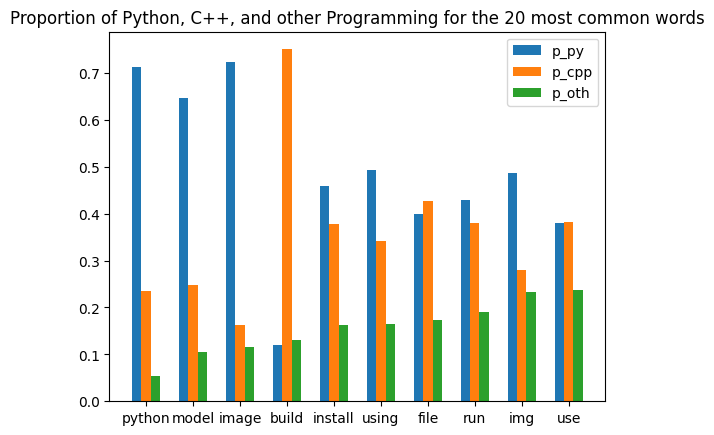

In [136]:
# calc top 10
proportions = (word_counts
    .assign(p_py=word_counts['py'] / word_counts['all'],
            p_cpp=word_counts['cpp'] / word_counts['all'],
            p_oth=word_counts['other'] / word_counts['all'])
    .sort_values(by='all')
    [['p_py', 'p_cpp', 'p_oth']]
    .tail(10)
    .sort_values('p_oth')
)


# positions
bar_width = 0.2  # spacing
bar_positions = list(range(len(proportions)))

# plot
fig, ax = plt.subplots()
for i, category in enumerate(['p_py', 'p_cpp', 'p_oth']):
    ax.bar(bar_positions, proportions[category], bar_width, label=category)
    bar_positions = [pos + bar_width for pos in bar_positions]

ax.set_xticks([pos + bar_width for pos in range(len(proportions))])
ax.set_xticklabels(proportions.index)
ax.set_title('Proportion of Python, C++, and other Programming for the 20 most common words')
ax.legend()

plt.show()